In [21]:
# Librerías
#pip install --upgrade pandas
#!pip install geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Situación del mercado de alquileres

### Datos detallados del calendario para las publicaciones

A continuación se lee y se muestra la cabecera del `dataframe`que muestra los datos detallados del calendario para las publicaciones, y se inspecciona su estructura:

In [72]:
df_calendar = pd.read_csv('./dataset_nuevo/calendar.csv.gz', sep=',', parse_dates=['date'], index_col='listing_id')
df_calendar.head()

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
6369,2020-01-11,f,$80.00,$80.00,1.0,365.0
96072,2020-01-11,f,$25.00,$25.00,3.0,365.0
96072,2020-01-12,f,$25.00,$25.00,3.0,365.0
96072,2020-01-13,f,$25.00,$25.00,3.0,365.0
96072,2020-01-14,f,$25.00,$25.00,3.0,365.0


In [73]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7845708 entries, 6369 to 41281944
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   available       object        
 2   price           object        
 3   adjusted_price  object        
 4   minimum_nights  float64       
 5   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 419.0+ MB


Las columnas de `price` y `adjusted_price` tienen el símbolo del dólar. Se va a eliminar este símbolo (al igual que las comas) y a convertir las columnas en numéricas para trabajar con ellas con más facilidad.

In [74]:
df_calendar['price'] = df_calendar['price'].str.replace("$", '').str.replace(',','').astype('float64')
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].str.replace("$", '').str.replace(',','').astype('float64')
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7845708 entries, 6369 to 41281944
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   available       object        
 2   price           float64       
 3   adjusted_price  float64       
 4   minimum_nights  float64       
 5   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 419.0+ MB


Ahora los tipos de datos son correctos. Se inspecciona si el `dataframe` tiene valores nulos:

In [75]:
df_calendar.isna().sum()

date                0
available           0
price             171
adjusted_price    171
minimum_nights      4
maximum_nights      4
dtype: int64

Como el `dataframe` tiene mucha información y muchas filas, se opta por eliminar las filas con valores nulos, ya que no creo que tengan un impacto negativo en el análisis exploratorio:

In [76]:
df_calendar.dropna(inplace=True)

date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

Se va a proceder a obtener una descripción de las columnas numéricas de `df_calendar`. Se muestran los resultados de los cuantiles [0.25, 0.5, 0.75, 0.95, 0.99, 0.995]

In [77]:
# Solo columnas numéricas
df_calendar.describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99, 0.995], include=np.number)

,price,adjusted_price,minimum_nights,maximum_nights
count,7.845533e+06,7.845533e+06,7.845533e+06,7.845533e+06
mean,1.423431e+02,1.420381e+02,4.693651e+00,6.443547e+03
std,4.374274e+02,4.361963e+02,2.288716e+01,7.616210e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.000000e+01,4.000000e+01,1.000000e+00,4.000000e+01
50%,7.000000e+01,7.000000e+01,2.000000e+00,1.125000e+03
75%,1.200000e+02,1.200000e+02,3.000000e+00,1.125000e+03
95%,4.140000e+02,4.140000e+02,1.200000e+01,1.125000e+03
99%,1.169000e+03,1.169000e+03,5.000000e+01,1.125000e+03
99.5%,1.500000e+03,1.500000e+03,9.000000e+01,1.125000e+03


Podemos realizar una distribución de densidad de los precios para ver la distribución de los mismos:

C:\Users\valde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Densidad')

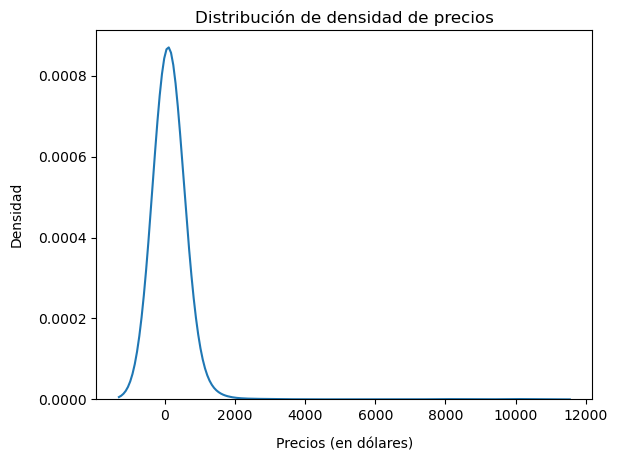

In [86]:
# Se establece la distribución de densidad de la columna 'price' especificando con 'bw' el ancho de banda de suavizado que se usa
ax = sns.kdeplot(data=df_calendar, x="price", bw_method=1)

# Se establece el título y los 'labels' de la gráfica
ax.set_title('Distribución de densidad de precios', pad=5, fontsize=12)
ax.set_xlabel('Precios (en dólares)', labelpad=10, fontsize=10)
ax.set_ylabel('Densidad', labelpad=10, fontsize=10)

Efectivamente, parece que la media y la mediana de los precios está en torno a los 70 dólares, y que hay pocas propiedades en alquiler por encima de los 1000 dólares. Ahora pasamos a ver las correlaciones entre las distintas columnas numéricas:

In [88]:
calendar_target = ['price', 'adjusted_price', 'minimum_nights', 'maximum_nights']

# Se muestra la correlación entre estas cuatro columnas y se colorea cada una de ellas según su importancia 
# con 'DataFrame.style.background_gradient()'
df_calendar[calendar_target].corr(method='pearson').style.background_gradient()

,price,adjusted_price,minimum_nights,maximum_nights
price,1.000000,0.999686,-0.013988,0.000004
adjusted_price,0.999686,1.000000,-0.013999,0.000009
minimum_nights,-0.013988,-0.013999,1.000000,-0.001103
maximum_nights,0.000004,0.000009,-0.001103,1.000000


Se aprecia una correlación positiva muy fuerte entre el precio y el precio ajustado, como se podía preveer al mostrar el `dataframe`. También vemos como no hay correlación ninguna entre los precios y los noches máximas o mínimas de alquiler.

Por último, para este dataframe creo que sería útil ver como evolucionan los precios a medida que pasan las fechas.

In [94]:
# Se lee de nuevo el dataframe especificando como índice la columna 'date' y quedándonos solamente con la columna 'price',
# eliminando los símbolos ',' y '$' como se ha realizado arriba
df_calendar_ts = pd.read_csv('./dataset_nuevo/calendar.csv.gz', sep=',', parse_dates=['date'], index_col='date')[['price']]
df_calendar_ts['price'] = df_calendar_ts['price'].str.replace("$", '').str.replace(',','').astype('float64')
df_calendar_ts.head()

,price
date,
2020-01-11,80.0
2020-01-11,25.0
2020-01-12,25.0
2020-01-13,25.0
2020-01-14,25.0


Si se agrupa el `dataframe` por fechas (días) y se realiza la media de los precios en cada una de ellas, se puede ver como evolucionan los precios cada día. El resultado sería una serie temporal con muchas variaciones. Para solucionar esto, se hace `downsampling` para tener una menor frecuencia (cada dos semanas en este caso):

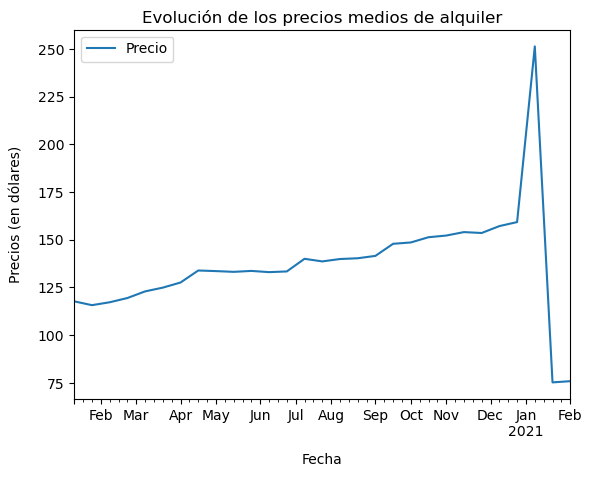

In [117]:
ax = df_calendar_ts.groupby('date').mean().resample(rule='2W').mean().plot()

# Se establece el título y los 'labels' de la gráfica
ax.set_title('Evolución de los precios medios de alquiler', pad=5, fontsize=12)
ax.set_xlabel('Fecha', labelpad=10, fontsize=10)
ax.set_ylabel('Precios (en dólares)', labelpad=10, fontsize=10)
plt.legend(["Precio"])

Como se puede apreciar, los precios han tenido a lo largo de 2020 una tendencia ascendente, con una fuerte subida en diciembre, en épocas navideñas. A partir de aquí y con el comienzo del nuevo año y de las épocas festivas, los precios cayeron a un mínimo global en torno a finales de enero de 2021. Hay que tener en cuenta que 2020 fue un año especial por ser el año de la pandemia y de la cuarentena, por lo que hay que tener mucho cuidado a la hora de extraer conclusiones a partir de este gráfico. <br>
Eso sí, si que parece claro que en épocas navideñas los precios se disparan y que una vez pasan estas fechas, el bajón de precios es considerable.

### Resumen de información y métricas para las publicaciones

A continuación se lee y se muestra la cabecera del `dataframe` que muestra el resumen de información y métricas para las publicaciones y se inspecciona su estructura:

In [234]:
df_listing_summary = pd.read_csv('./dataset_nuevo/listings.csv', sep=',', index_col='id', parse_dates=['last_review'])
df_listing_summary.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,73,2019-12-13,0.61,1,82
21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.52,2,162
23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaT,NaN,6,213
24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,9,2020-01-03,0.14,1,362
24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,67,2019-12-08,0.64,1,342


In [235]:
df_listing_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21495 entries, 6369 to 41452557
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            21492 non-null  object        
 1   host_id                         21495 non-null  int64         
 2   host_name                       21470 non-null  object        
 3   neighbourhood_group             21495 non-null  object        
 4   neighbourhood                   21495 non-null  object        
 5   latitude                        21495 non-null  float64       
 6   longitude                       21495 non-null  float64       
 7   room_type                       21495 non-null  object        
 8   price                           21495 non-null  int64         
 9   minimum_nights                  21495 non-null  int64         
 10  number_of_reviews               21495 non-null  int64         
 11  l

Todas las columnas tienen correctamente su tipo establecido. Se pasa a mostrar la correlación entre todas las variables numéricas:

In [236]:
target = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month',
         'calculated_host_listings_count', 'availability_365']

# Se muestra la correlación entre estas cuatro columnas y se colorea cada una de ellas según su importancia 
# con 'DataFrame.style.background_gradient()'
df_listing_summary[target].corr(method='pearson').style.background_gradient()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.246657,0.037647,0.004586,-0.049415,-0.061073,-0.028985,-0.000796,0.001133
longitude,0.246657,1.000000,0.051922,-0.016257,-0.054029,-0.089331,0.023903,-0.054008,-0.000624
price,0.037647,0.051922,1.000000,-0.014658,-0.074793,-0.161354,-0.041010,0.057652,0.061795
minimum_nights,0.004586,-0.016257,-0.014658,1.000000,-0.043536,-0.045839,-0.069528,-0.022443,0.029423
number_of_reviews,-0.049415,-0.054029,-0.074793,-0.043536,1.000000,0.288836,0.659177,-0.062933,0.044483
last_review,-0.061073,-0.089331,-0.161354,-0.045839,0.288836,1.000000,0.386139,0.009144,0.017389
reviews_per_month,-0.028985,0.023903,-0.041010,-0.069528,0.659177,0.386139,1.000000,-0.105144,0.018325
calculated_host_listings_count,-0.000796,-0.054008,0.057652,-0.022443,-0.062933,0.009144,-0.105144,1.000000,0.174474
availability_365,0.001133,-0.000624,0.061795,0.029423,0.044483,0.017389,0.018325,0.174474,1.000000


Se puede ver como hay una correlación positiva alta entre el número de `reviews` y las `reviews` por mes. En cuánto al precio, no parece que haya ninguna variable numérica que influya en ella positiva o negativamente. <br>
Por otra parte, en este `dataframe` aparece información sobre los distritos de Madrid. Se realiza un diagrama de cajas para ver como se distribuye el precio en cada uno de estos distritos (sin valores atípicos, para ver la gráfica con más claridad):

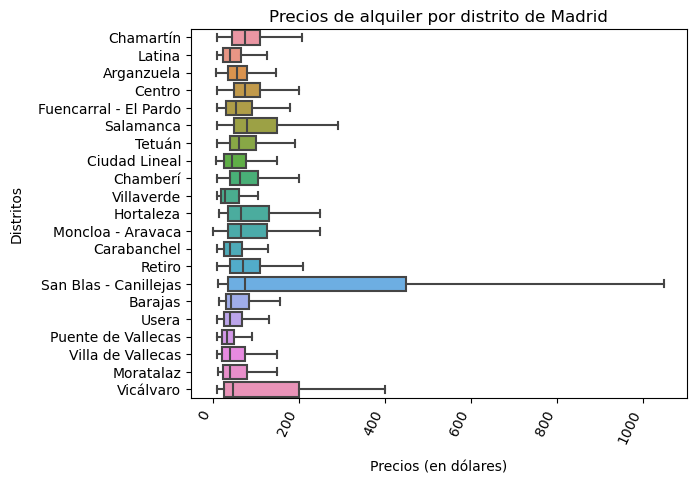

In [327]:
# Diagrama de cajas sin outliers (showfliers es False)
sns.boxplot(data=df_listing_summary, x='price', y='neighbourhood_group', showfliers=False)

# Se establece el título, los 'ticks' en el eje X y los 'labels' de la gráfica
plt.title('Precios de alquiler por distrito de Madrid', pad=5, fontsize=12)
plt.xlabel('Precios (en dólares)', labelpad=10, fontsize=10)
plt.ylabel('Distritos', labelpad=10, fontsize=10)
plt.xticks(rotation = 65, ha='right');

Como se puede ver en el diagrama de cajas, según las medianas los precios más altos están en distritos como los de San Blas - Canillejas, Salamanca o Chamartín. En cambio, los más bajos están en distritos como Carabanchel, Villaverde o Puente de Vallecas. El máximo (sin valores atípicos) se da claramente en el distrito de San Blas - Canillejas, con un precio de más de 1000 dólares.

También se puede hacer un diagrama de violínes para ver la distribución de los precios en cada uno de los tipos de habitaciones ofertados:

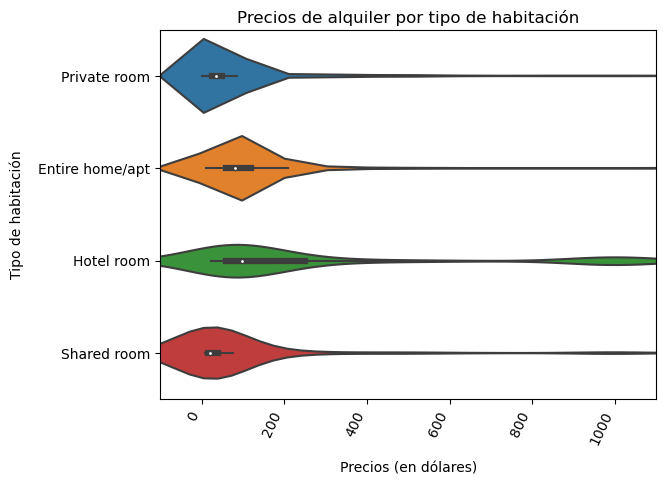

In [238]:
# Diagrama de violines (limitando el eje X para ver mejor la gráfica)
ax = sns.violinplot(data=df_listing_summary, x='price', y='room_type', inner='box')
ax.set(xlim=(-100, 1100))

# Se establece el título, los 'ticks' en el eje X y los 'labels' de la gráfica
plt.title('Precios de alquiler por tipo de habitación', pad=5, fontsize=12)
plt.xlabel('Precios (en dólares)', labelpad=10, fontsize=10)
plt.ylabel('Tipo de habitación', labelpad=10, fontsize=10)
plt.xticks(rotation = 65, ha='right');

En esta ocasión se puede ver como los precios más caros son de habitaciones de hoteles y de casas/apartamentos enteros, mientras que los precios más bajos son de habitaciones privadas y habitaciones compartidas.

Ahora pasamos a analizar un poco los datos geoespaciales. Para empezar, estaría bien mostrar el precio medio del alquiler en cada uno de los barrios de Madrid. Para ello cargamos el archivo GeoJSON y lo fusionamos con `df_listing_summary`, agrupando los resultados por barrios y calculando el precio medio del alquiler en cada uno de ellos:

<Axes: >

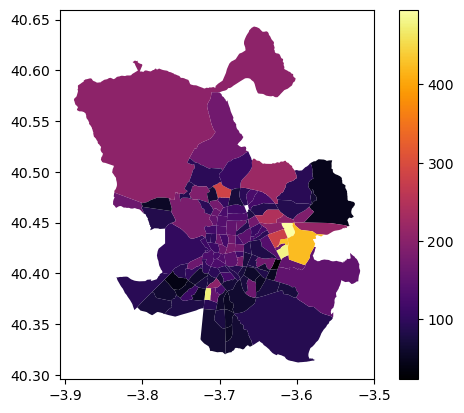

In [338]:
# Archivo GeoJSON con todos los barrios de Madrid
geojson = gpd.read_file('./dataset_nuevo/neighbourhoods.geojson')

# Se fusiona el archivo GeoJSON con las dos columnas de 'df_listing_summary', agrupando el GeoDataframe
# por barrio, calculando la media de los precios. Por último se dibuja el mapa de calor
geojson.merge(df_listing_summary[['price', 'neighbourhood']], on = 'neighbourhood') \
                .dissolve(by='neighbourhood', aggfunc={"price": "mean"}) \
                .plot('price', cmap = 'inferno', legend=True)

La información mostrada aquí muestra que los precios de alquiler medios más caros están en barrios como Canillejas, Arcos o Zofío. Por otro lado, los precios medios más baratos se encuentran en barrios como Horcajo, Aluche o Vista Alegre.

### Detalle de las publicaciones

In [228]:
# Dataframe de la lista de barrios
df_geojson = pd.read_csv('./dataset_nuevo/neighbourhoods.csv', sep=',').sort_values(by='neighbourhood')
df_geojson.head()

,neighbourhood_group,neighbourhood
12,Carabanchel,Abrantes
0,Arganzuela,Acacias
86,Retiro,Adelfas
7,Barajas,Aeropuerto
60,Latina,Aguilas


In [229]:
# Archivo GeoJSON con todos los barrios de Madrid
geojson = gpd.read_file('./dataset_nuevo/neighbourhoods.geojson').sort_values(by='neighbourhood')

# El dataframe se pasa a JSON
geojson

,neighbourhood,neighbourhood_group,geometry
74,Abrantes,Carabanchel,"MULTIPOLYGON (((-3.72173 40.38525, -3.72105 40..."
7,Acacias,Arganzuela,"MULTIPOLYGON (((-3.70379 40.40521, -3.70288 40..."
14,Adelfas,Retiro,"MULTIPOLYGON (((-3.67283 40.39468, -3.67343 40..."
125,Aeropuerto,Barajas,"MULTIPOLYGON (((-3.57786 40.51038, -3.57579 40..."
68,Aguilas,Latina,"MULTIPOLYGON (((-3.77000 40.39261, -3.76742 40..."
...,...,...,...
51,Valverde,Fuencarral - El Pardo,"MULTIPOLYGON (((-3.65851 40.51168, -3.65780 40..."
91,Ventas,Ciudad Lineal,"MULTIPOLYGON (((-3.62669 40.41587, -3.62750 40..."
90,Vinateros,Moratalaz,"MULTIPOLYGON (((-3.63936 40.40622, -3.63932 40..."
71,Vista Alegre,Carabanchel,"MULTIPOLYGON (((-3.73939 40.38465, -3.74091 40..."


In [ ]:
df_listing = pd.read_csv('./dataset_nuevo/listings.csv.gz', sep=',', index_col='id')
df_listing.head()

In [58]:
df_listing_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21495 entries, 6369 to 41452557
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            21492 non-null  object        
 1   host_id                         21495 non-null  int64         
 2   host_name                       21470 non-null  object        
 3   neighbourhood_group             21495 non-null  object        
 4   neighbourhood                   21495 non-null  object        
 5   latitude                        21495 non-null  float64       
 6   longitude                       21495 non-null  float64       
 7   room_type                       21495 non-null  object        
 8   price                           21495 non-null  int64         
 9   minimum_nights                  21495 non-null  int64         
 10  number_of_reviews               21495 non-null  int64         
 11  l

Puede observarse que existen valores perdidos en este conjunto, y que la codificación de los datos es correcta.